**PRACTICAL 08 | DEEP LEARNING**

MONISHA DEHANKAR | 06

**Perform And Implement Brain Tumor Classification Using CNN**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical


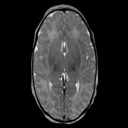

In [ ]:
im =Image.open('/content/drive/MyDrive/dl practical no 8/brain_tumor_dataset/no/12 no.jpg').resize((128,128))
im

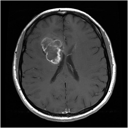

In [ ]:
im =Image.open('/content/drive/MyDrive/dl practical no 8/brain_tumor_dataset/yes/Y101.jpg').resize((128,128))
im


In [ ]:
yes=os.listdir('/content/drive/MyDrive/dl practical no 8/brain_tumor_dataset/yes')
no=os.listdir('/content/drive/MyDrive/dl practical no 8/brain_tumor_dataset/no')

In [ ]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [ ]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [ ]:
len(data_target)==len(data)


True

In [ ]:
data_target


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
data


array(['Y11.jpg', 'Y114.JPG', 'Y107.jpg', 'Y116.JPG', 'Y102.jpg',
       'Y10.jpg', 'Y109.JPG', 'Y103.jpg', 'Y112.JPG', 'Y100.JPG',
       'Y113.JPG', 'Y115.JPG', 'Y108.jpg', 'Y101.jpg', 'Y105.jpg',
       'Y104.jpg', 'Y106.jpg', 'Y1.jpg', 'Y111.JPG', 'Y117.JPG',
       'Y148.JPG', 'Y120.JPG', 'Y185.jpg', 'Y159.JPG', 'Y168.jpg',
       'Y169.jpg', 'Y164.JPG', 'Y180.jpg', 'Y167.JPG', 'Y153.jpg',
       'Y183.jpg', 'Y13.jpg', 'Y17.jpg', 'Y16.JPG', 'Y160.JPG',
       'Y161.JPG', 'Y181.jpg', 'Y163.JPG', 'Y147.JPG', 'Y158.JPG',
       'Y165.JPG', 'Y170.JPG', 'Y146.JPG', 'Y166.JPG', 'Y14.jpg',
       'Y157.JPG', 'Y15.jpg', 'Y155.JPG', 'Y156.JPG', 'Y12.jpg',
       'Y162.jpg', 'Y184.JPG', 'Y18.JPG', 'Y182.JPG', 'Y154.jpg',
       'Y258.JPG', 'Y248.JPG', 'Y254.jpg', 'Y186.jpg', 'Y247.JPG',
       'Y243.JPG', 'Y22.jpg', 'Y25.jpg', 'Y245.jpg', 'Y256.JPG',
       'Y195.JPG', 'Y249.JPG', 'Y244.JPG', 'Y19.JPG', 'Y187.jpg',
       'Y242.JPG', 'Y29.jpg', 'Y28.jpg', 'Y246.JPG', 'Y251.JPG',
       'Y25

In [ ]:
yes_values=os.listdir('/content/drive/MyDrive/dl practical no 8/brain_tumor_dataset/yes')
no_values=os.listdir('/content/drive/MyDrive/dl practical no 8/brain_tumor_dataset/no')


In [ ]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/dl practical no 8/brain_tumor_dataset/yes/' + file)
    if img is not None:
        face = cv2.resize(img, (32, 32))
        # Rest of your code
    else:
        print(f"Failed to load image: {file}")
    (b, g, r)=cv2.split(face)
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/dl practical no 8/brain_tumor_dataset/no/' + file)
    if img is not None:
        face = cv2.resize(img, (32, 32))
        # Rest of your code
    else:
        print(f"Failed to load image: {file}")
    (b, g, r)=cv2.split(face)
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
len(X_data)==len(data)==len(data_target)

True

In [ ]:
X = np.squeeze(X_data)

In [ ]:
X.shape

(253, 32, 32, 3)

In [ ]:
# normalize data
X = X.astype('float32')
X /= 255

In [ ]:
categorical_labels = to_categorical(data_target, num_classes=2)


In [ ]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 3s 566ms/step - loss: 0.6205 - acc: 0.5789 - val_loss: 1.2005 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 1s 388ms/step - loss: 0.4736 - acc: 0.8158 - val_loss: 0.8909 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 1s 304ms/step - loss: 0.4621 - acc: 0.8158 - val_loss: 0.9746 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 1s 561ms/step - loss: 0.4450 - acc: 0.8158 - val_loss: 1.0939 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 1s 585ms/step - loss: 0.4610 - acc: 0.8158 - val_loss: 1.0938 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 1s 526ms/step - loss: 0.4572 - acc: 0.8158 - val_loss: 0.9272 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 1s 300ms/step - loss: 0.4537 - acc: 0.8158 - val_loss: 0.9190 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 1s 3

In [ ]:
# prompt: solve error of line "from keras.utils.vis_utils import model_to_dot"

!pip install pydot


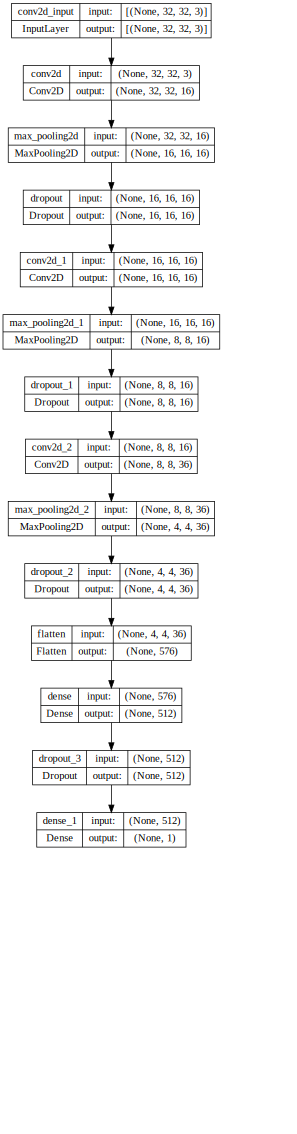

In [ ]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.682539701461792


In [ ]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

2/2 [==============================] - 0s 85ms/step


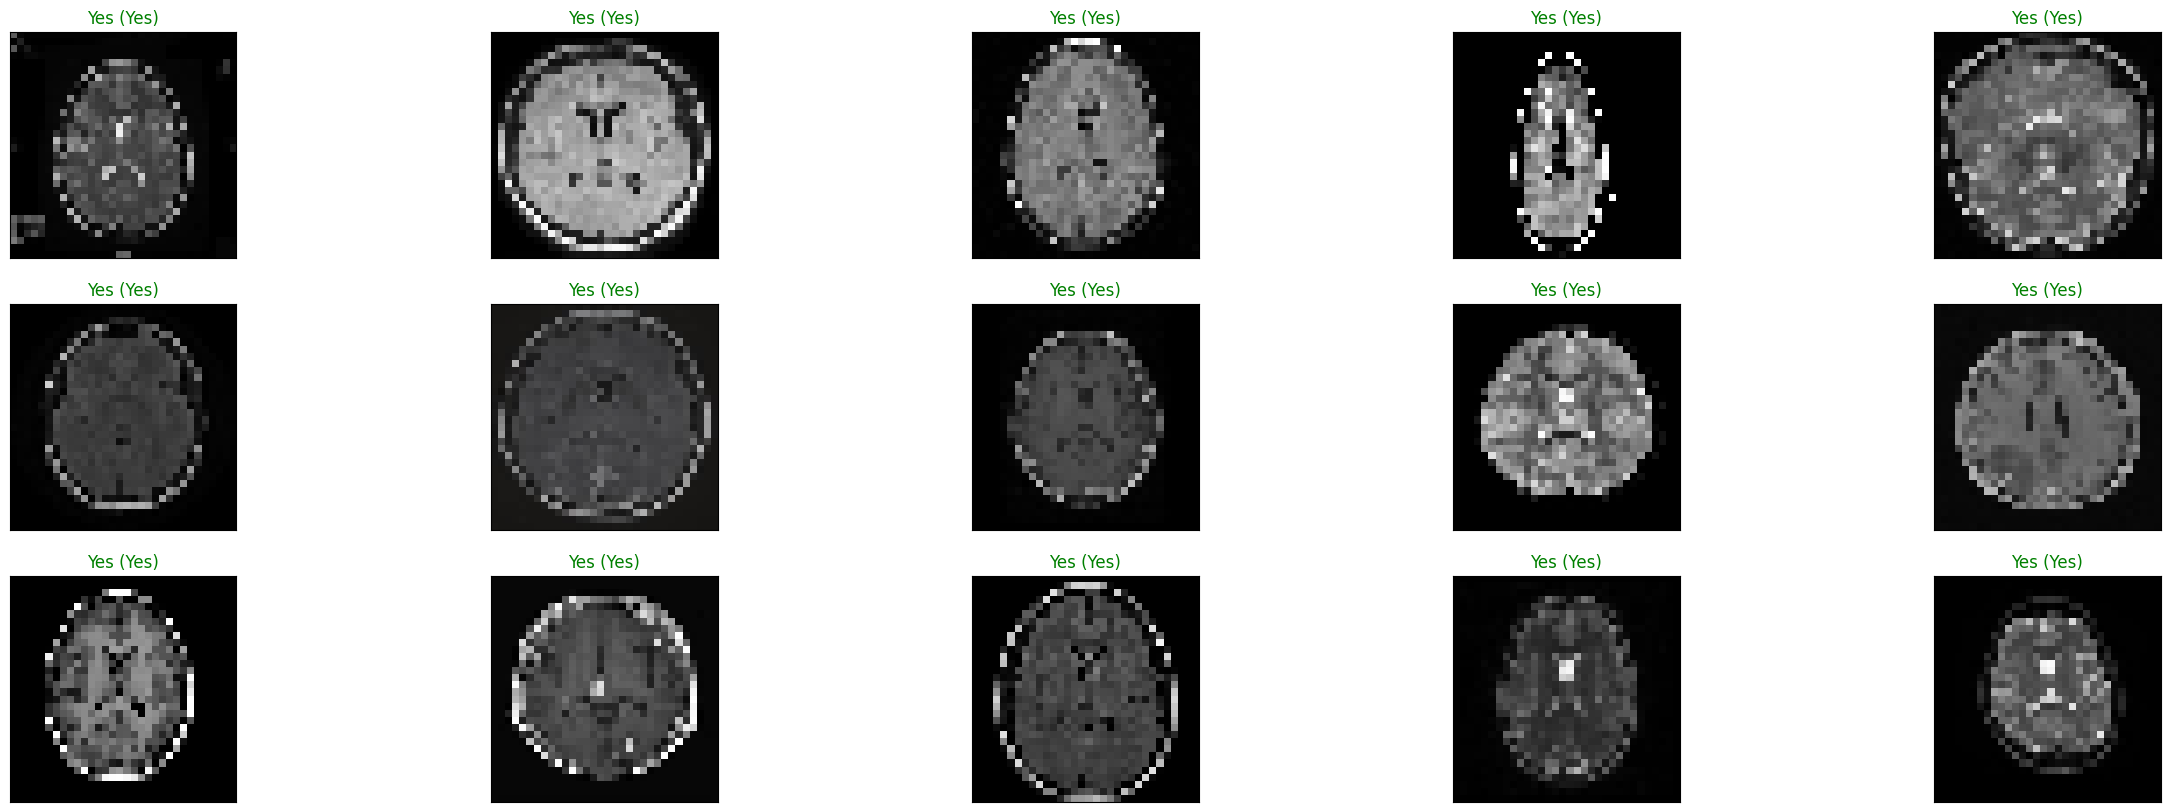

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(30, 10))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()